# Tweet Sentiment Analysis

# Essential Purpose

Skills tested: using Pandas to read and explore the dataset.
Using Scikit-Learn for splitting your dataset.
Using Keras to build your recurrent neural networks for simple sentiment analysis.
In this mini project, you will use an RNN-based classifier to estimate the emotion of a tweet based on words of the tweet text.
The dataset consists of 40,000 tweets with sentiments. The sentiment is one of five (5) classes. The dataset features are:

Tweet ID (ignore)

Sentiment (categorical): tweet sentiment (target)

Author (ignore)

Content (string): text content of the tweet

License: Public domain (CC0)

## Expected Output

By the end of this mini project, you will need to deliver within your code:

The summary of the neural network used using model.summary().

The accuracy measure for the testing data.

Submission of your project on GitHub is optional. If you choose to manage your project using GitHub, find guidelines for using GitHub here. Ensure you are coding using your Jupyter Notebook – it will be uploaded to GitHub when you perform a Git push operation.

You are expected to write around 35 lines of code to complete this project.


# Reading the Dataset
Read and prepare your dataset.
Calculate:

Vocabulary size

Maximum sequence length

Divide your dataset into training and testing sets:

70% training set

30% Testing set

In [1]:
import pandas as pd
data=pd.read_csv('text_emotion.csv')
data=data[['sentiment','content']]

In [2]:
import numpy as np
categories=np.unique(data.sentiment)
num_categories=np.size(categories)

In [43]:
np.shape(data)

(40000, 3)

In [3]:
from tensorflow.keras.utils import to_categorical

<AxesSubplot:>

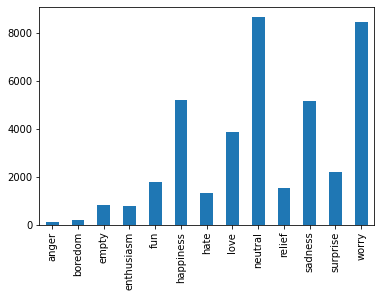

In [4]:
data['sentiment'].value_counts().sort_index().plot.bar()

In [44]:
data['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

<AxesSubplot:ylabel='Frequency'>

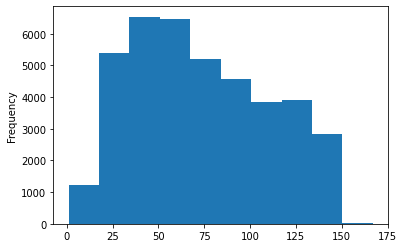

In [5]:
data['content'].str.len().plot.hist()

In [6]:
#remove symbols and convert to lower case
data['content'] = data['content'].str.replace('(@\w+.*?)',"")
data['content'] = data['content'].apply(lambda x: x.lower())

data.head(5)

C:\Users\Douglas\AppData\Local\Temp/ipykernel_6696/214220008.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['content'] = data['content'].str.replace('(@\w+.*?)',"")


,sentiment,content
0,empty,i know i was listenin to bad habit earlier a...
1,sadness,layin n bed with a headache ughhhh...waitin o...
2,sadness,funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends soon!
4,neutral,we want to trade with someone who has houston...


In [7]:
# Reducing the number of sentiments from 13 to 5.
data['sentiment2'] = data['sentiment']

data['sentiment2'] = data['sentiment2'].str.replace('hate','very negative')
data['sentiment2'] = data['sentiment2'].str.replace('anger','very negative')
data['sentiment2'] = data['sentiment2'].str.replace('worry','negative')

data['sentiment2'] = data['sentiment2'].str.replace('sadness','negative')
data['sentiment2'] = data['sentiment2'].str.replace('boredom','negative')
data['sentiment2'] = data['sentiment2'].str.replace('empty','negative')

data['sentiment2'] = data['sentiment2'].str.replace('fun','positive')
data['sentiment2'] = data['sentiment2'].str.replace('relief','positive')
data['sentiment2'] = data['sentiment2'].str.replace('surprise','positive')

data['sentiment2'] = data['sentiment2'].str.replace('enthusiasm','very positive')
data['sentiment2'] = data['sentiment2'].str.replace('love','very positive')
data['sentiment2'] = data['sentiment2'].str.replace('happiness','very positive')

In [8]:
data['sentiment2'].value_counts()

negative         14630
very positive     9810
neutral           8638
positive          5489
very negative     1433
Name: sentiment2, dtype: int64

In [9]:
max_sequence_length=np.max(data['content'].str.len())
max_sequence_length

167

In [10]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(data['content'].values)
x = tokenizer.texts_to_sequences(data['content'].values)

In [11]:
tokens = tokenizer.word_index
tokens

{'i': 1,
 'to': 2,
 'the': 3,
 'a': 4,
 'my': 5,
 'and': 6,
 'you': 7,
 'it': 8,
 'is': 9,
 'in': 10,
 'for': 11,
 'of': 12,
 'me': 13,
 'on': 14,
 'have': 15,
 'so': 16,
 'that': 17,
 'but': 18,
 "i'm": 19,
 'just': 20,
 'day': 21,
 'with': 22,
 'be': 23,
 'at': 24,
 'was': 25,
 'not': 26,
 'good': 27,
 'all': 28,
 'this': 29,
 'now': 30,
 'out': 31,
 'up': 32,
 'get': 33,
 'like': 34,
 'are': 35,
 'no': 36,
 'quot': 37,
 'http': 38,
 'go': 39,
 "it's": 40,
 'do': 41,
 'your': 42,
 'today': 43,
 'work': 44,
 'love': 45,
 'got': 46,
 'too': 47,
 'going': 48,
 'happy': 49,
 'lol': 50,
 'from': 51,
 'one': 52,
 'time': 53,
 'u': 54,
 'know': 55,
 'back': 56,
 'what': 57,
 'com': 58,
 'im': 59,
 'will': 60,
 'really': 61,
 'we': 62,
 'about': 63,
 'am': 64,
 "don't": 65,
 'its': 66,
 'see': 67,
 'amp': 68,
 'there': 69,
 'had': 70,
 'can': 71,
 "can't": 72,
 'some': 73,
 'if': 74,
 'night': 75,
 'new': 76,
 'home': 77,
 'think': 78,
 'well': 79,
 'thanks': 80,
 '2': 81,
 'when': 82,
 'wan

In [18]:
vocabulary_size = len(tokens)+1
vocabulary_size

33249

In [19]:
# Pad the data to make the length the same.
from keras.preprocessing.sequence import pad_sequences
x = pad_sequences(x) 
x[:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    1,   55,    1,
          25, 3217,    2,  120, 4520,  848,    6,    1,  613, 1386,   24,
         183,  560],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,  288,  147,   22,    4,  433, 3463, 2561,   14,
          42,  293],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0, 2699, 4096,
        1742,  236]])

In [24]:
max_sequence_length =x.shape[1]
print(max_sequence_length)

35


In [25]:
y = pd.get_dummies(data['sentiment2']).values
[print(data['sentiment'][i], y[i]) for i in range(0,10)]

empty [1 0 0 0 0]
sadness [1 0 0 0 0]
sadness [1 0 0 0 0]
enthusiasm [0 0 0 0 1]
neutral [0 1 0 0 0]
worry [1 0 0 0 0]
sadness [1 0 0 0 0]
worry [1 0 0 0 0]
sadness [1 0 0 0 0]
sadness [1 0 0 0 0]


[None, None, None, None, None, None, None, None, None, None]

In [26]:
# divide dataset into test and train 
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0)

# Define your Recurrent Neural Network
Define an RNN with the following layers:

The input layer is an embedding layer with the following parameters:

the input dimension is the vocabulary size;

 the output dimension is 10;
 
the input length is the maximum sequence length;

 Define an LSTM layer with 128 units;
 
Define an LSTM layer with 64 units;

Define a fully connected layer with:

 100 units;
 
 activation function: ReLU;
 
 A Dropout layer with 0.5 rate;
 
The output layer is a fully-connected layer with:

 5 units and
 
 activation function: softmax.

In [29]:
from tensorflow.keras.models import Sequential
model = Sequential()

from tensorflow.keras.layers import Embedding
model.add(Embedding(input_dim=vocabulary_size, output_dim=10, input_length=max_sequence_length))

from tensorflow.keras.layers import LSTM

model.add(LSTM(units=128, return_sequences=True))

from tensorflow.keras.layers import LSTM
model.add(LSTM(64))

from tensorflow.keras.layers import Dense
model.add(Dense(units=100, activation='relu'))

from tensorflow.keras.layers import Dropout
model.add(Dropout(0.5))

model.add(Dense(units=5, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 35, 10)            332490    
                                                                 
 lstm_6 (LSTM)               (None, 35, 128)           71168     
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 100)               6500      
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 505       
                                                                 
Total params: 460,071
Trainable params: 460,071
Non-tr

# Choosing Hyperparameters
Build the network using the following parameters:

 Optimizer: Adam
 
Loss function: categorical_crossentropy

Metrics: accuracy

Batch size: 256

Epochs: 10

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
model.fit(Xtrain, ytrain, epochs=10, batch_size=256)

Epoch 1/10
110/110 [==============================] - 40s 302ms/step - loss: 1.4656 - accuracy: 0.3550
Epoch 2/10
110/110 [==============================] - 37s 338ms/step - loss: 1.3498 - accuracy: 0.4403
Epoch 3/10
110/110 [==============================] - 35s 320ms/step - loss: 1.2365 - accuracy: 0.5085
Epoch 4/10
110/110 [==============================] - 35s 321ms/step - loss: 1.1762 - accuracy: 0.5374
Epoch 5/10
110/110 [==============================] - 31s 278ms/step - loss: 1.1277 - accuracy: 0.5573
Epoch 6/10
110/110 [==============================] - 27s 248ms/step - loss: 1.0872 - accuracy: 0.5785
Epoch 7/10
110/110 [==============================] - 26s 239ms/step - loss: 1.0601 - accuracy: 0.5929
Epoch 8/10
110/110 [==============================] - 30s 277ms/step - loss: 1.0322 - accuracy: 0.6026
Epoch 9/10
110/110 [==============================] - 32s 295ms/step - loss: 1.0062 - accuracy: 0.6143
Epoch 10/10
110/110 [==============================] - 28s 250ms/step - l

# Training Network
Use Keras to implement the network described and train your data

Classification metrics:

Print the accuracy measure on the testing data.

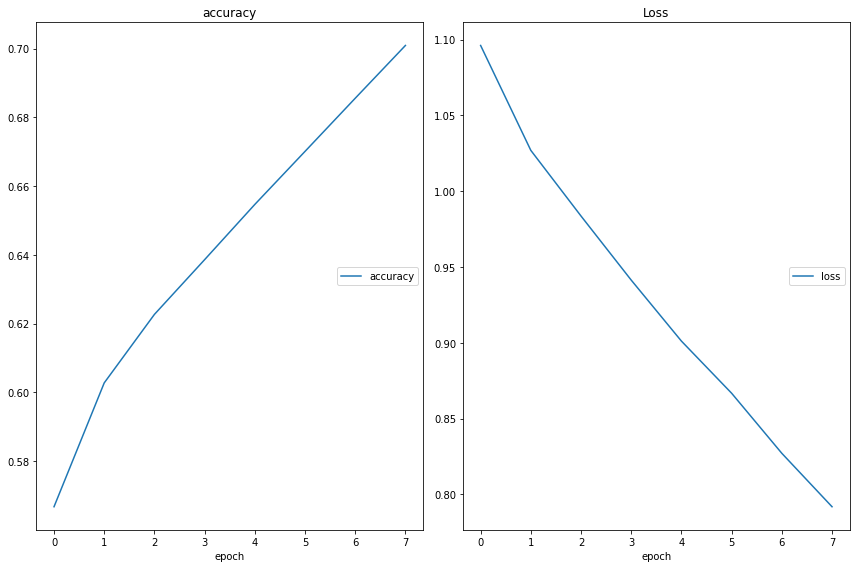

accuracy
	accuracy         	 (min:    0.567, max:    0.701, cur:    0.701)
Loss
	loss             	 (min:    0.792, max:    1.096, cur:    0.792)
875/875 [==============================] - 60s 68ms/step - loss: 0.7918 - accuracy: 0.7009


In [37]:
from keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras

callbacks = EarlyStopping(monitor = 'accuracy',
                         min_delta = 0.001,
                         patience = 10,
                         verbose = 0,
                         mode = "auto")

model.fit(Xtrain, ytrain,
            callbacks = [PlotLossesKeras()],
            epochs = 8,
            batch_size = 32)

In [41]:
predictions = model.predict(Xtest)

[print(predictions[i], ytest[i]) for i in range(0,15)]

[0.31023535 0.01441469 0.4342529  0.00627329 0.2348238 ] [1 0 0 0 0]
[9.9851459e-01 5.2106945e-04 4.7034136e-04 1.5988248e-06 4.9246853e-04] [0 1 0 0 0]
[9.9805331e-01 5.5874820e-04 6.3922780e-04 2.7508188e-06 7.4596587e-04] [1 0 0 0 0]
[9.7520524e-01 1.6099529e-02 3.6812159e-03 4.4147973e-03 5.9924711e-04] [1 0 0 0 0]
[4.0073693e-02 4.6410382e-02 9.3177862e-02 2.5225674e-05 8.2031286e-01] [0 0 1 0 0]
[1.1188050e-01 2.0866519e-04 1.6820261e-02 1.5129358e-07 8.7109047e-01] [0 0 0 0 1]
[0.19452964 0.24767837 0.2251374  0.01346684 0.31918773] [0 0 0 0 1]
[8.8366097e-01 1.8390344e-02 3.9285135e-02 5.0058862e-04 5.8162976e-02] [0 1 0 0 0]
[2.4463655e-04 1.0996714e-03 1.9606855e-03 7.7162582e-12 9.9669504e-01] [0 0 1 0 0]
[0.3758643  0.2376647  0.2626184  0.05256171 0.07129087] [0 0 0 0 1]
[9.99310017e-01 1.21379344e-04 3.22939799e-04 1.22352617e-07
 2.45490402e-04] [1 0 0 0 0]
[6.5226585e-02 8.3153665e-01 3.1347226e-02 6.4903827e-05 7.1824655e-02] [0 1 0 0 0]
[0.8071837  0.05685237 0.101695

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# Submit on Github